In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import cv2

In [4]:
ripe = 'ripe/*'
green = 'green/*'
overripe = 'overripe/*'

In [5]:
import glob

# 0-ripe, 1-green, 2-overripe
def process_training_data():
    train_data = []
    for img in glob.glob(ripe):
        img = cv2.resize(cv2.imread(img), (100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        train_data.append([np.array(img), np.array(0)])
    for img in glob.glob(green):
        img = cv2.resize(cv2.imread(img), (100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        train_data.append([np.array(img), np.array(1)]) 
    for img in glob.glob(overripe):
        img = cv2.resize(cv2.imread(img), (100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        train_data.append([np.array(img), np.array(2)])
    return train_data

255
Shape  (100, 100, 3)
0


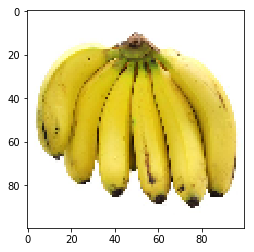

In [6]:
train_data = process_training_data()
print(len(train_data))
print('Shape ',train_data[0][0].shape)
plt.imshow(train_data[0][0])
print(train_data[0][1])

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D

Using TensorFlow backend.


In [8]:
model = Sequential()

model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(100,100,3)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(AveragePooling2D())

model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())
model.add(Dense(3,input_shape=(1,),activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        18464     
_________________________________________________________________
average_pooling2d_1 (Average (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
average_pooling2d_2 (Average (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16928)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 50787     
Total para

In [11]:
X_data = [i[0].reshape(100, 100, 3) for i in train_data]
y_data = [i[1] for i in train_data]
X_data = np.array(X_data)
y_data = np.array(y_data)

In [12]:
X_data.shape

(255, 100, 100, 3)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 0)

1


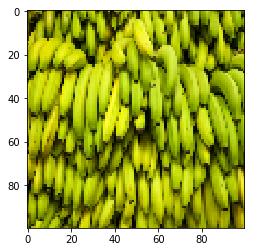

In [14]:
plt.imshow(X_train[0].reshape(100,100,3))
print(y_train[0])

In [15]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=3)

Instructions for updating:
Use tf.cast instead.
Train on 204 samples, validate on 51 samples
Epoch 1/3
204/204 [==============================] - 13s - loss: 13.3182 - acc: 0.1716 - val_loss: 14.2218 - val_acc: 0.1176
Epoch 2/3
204/204 [==============================] - 11s - loss: 13.2737 - acc: 0.1765 - val_loss: 14.2218 - val_acc: 0.1176
Epoch 3/3
204/204 [==============================] - 11s - loss: 13.2737 - acc: 0.1765 - val_loss: 14.2218 - val_acc: 0.1176


In [16]:
model.evaluate(X_test,y_test)

51/51 [==============================] - 0s     


[14.22184891794242, 0.11764705896961923]

In [17]:
model.save('saved_models/banana.h5')

In [19]:
from keras.models import load_model
model = load_model('saved_models/banana.h5')

In [21]:
testimage = 'images.jpeg'
img = cv2.resize(cv2.imread(testimage), (100, 100))
img = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2RGB)])
predictions = model.predict(img)

In [22]:
predictions

array([[0., 0., 1.]], dtype=float32)